> ### 本文档中，我们将展示在``ipython``中作图的舒适体验！

> 我们将介绍如下python包的使用：

> * **matplotlib**：最基础的python绘图包，大多数绘图包的基础组件，[matplotlib主页](http://matplotlib.org/)

> * **seabron**：基于matplotlib开发，目标是为**数据工作者**提供更舒适、更美观和更简洁的可视化体验。[seaborn主页](http://stanford.edu/~mwaskom/software/seaborn/#)

> * **bokeh**：基于web浏览器的交互式绘图工具包，可以打造动态性以及交互性兼备的图片。[bokeh主页](http://bokeh.pydata.org/en/latest/)

0. 预备
==========
***

In [2]:
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')

d:\Miniconda\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


1. 使用matplotlib交互绘图
========================
***

在这个例子中，我们将step by step的在notebook环境下复制下面的，同样功能的matlab代码：

```python

    >> hold on
    >> plot([1,2,3], [4,5,6])
    >> plot([1,2,3], [7,8,9])
    >> title('Show interactive plotting', 'FontSize', 25)
    >> legend('first line', 'second line', 'location', 'best')
    >> ylabel('y value', 'FontSize', 16)
    >> xlabel('x value', 'FontSize', 16)
    >> hold off
    
```

绘图结果：

<img src="img/matlab_plotting.png">

下面的语句中, ``plt.ion()``等价于**matlab**中的语句``hold on``：

<IPython.core.display.Javascript object>


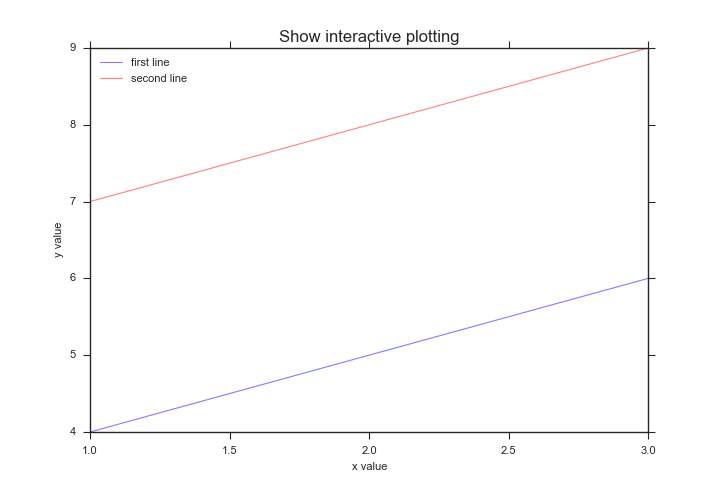

In [3]:
plt.ion()
plt.figure(figsize=(9,6))

绘制第一条曲线：

In [4]:
plt.plot([1,2,3], [4,5,6], linewidth=1.0, alpha=0.5, color='b')

绘制第二条曲线：

In [5]:
plt.plot([1,2,3], [7,8,9], linewidth=1.0, alpha=0.5, color='r')

添加上标题以及图例：

In [6]:
plt.title('Show interactive plotting', fontsize=15)
plt.legend(['first line', 'second line'], loc='best', fontsize=10)

增加y坐标标题：

In [7]:
plt.ylabel('y value', fontsize=10)

增加x坐标标题：

In [8]:
plt.xlabel('x value', fontsize=10)


2. DataAPI获取数据以及绘图
========================
***

**DataAPI**可以帮助用户方便从我们的数据库中获取数据，而不必关注数据库访问的细节：

In [8]:
%matplotlib inline
import DataAPI

df = DataAPI.api.get_equity_min5(['600000'], startDate='2001-01-01', endDate='2015-10-22')
df[['openPrice', 'highPrice', 'lowPrice', 'closePrice']].head()

,openPrice,highPrice,lowPrice,closePrice
timeStamp,,,,
2012-10-08 09:30:00,7.38,7.39,7.36,7.39
2012-10-08 09:35:00,7.39,7.42,7.38,7.40
2012-10-08 09:40:00,7.41,7.41,7.38,7.39
2012-10-08 09:45:00,7.40,7.40,7.39,7.39
2012-10-08 09:50:00,7.39,7.39,7.37,7.37


In [11]:
df['closePrice'][:10]

timeStamp
2012-10-08 09:30:00    7.39
2012-10-08 09:35:00    7.40
2012-10-08 09:40:00    7.39
2012-10-08 09:45:00    7.39
2012-10-08 09:50:00    7.37
2012-10-08 09:55:00    7.38
2012-10-08 10:00:00    7.38
2012-10-08 10:05:00    7.37
2012-10-08 10:10:00    7.36
2012-10-08 10:15:00    7.37
Name: closePrice, dtype: float64

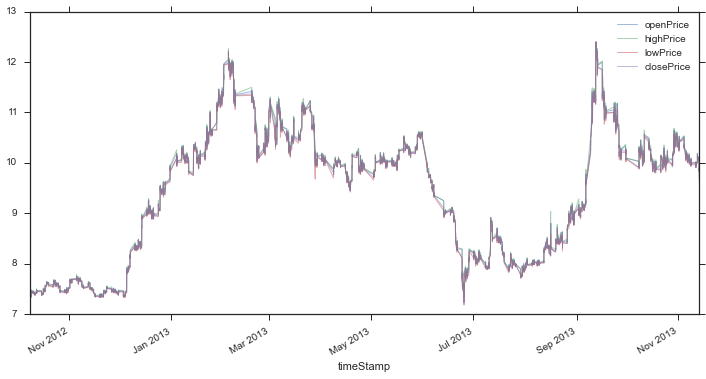

In [12]:
df[['openPrice', 'highPrice', 'lowPrice', 'closePrice']].plot(figsize=(12,6), linewidth=1.0, alpha=0.5)

计算收益率，并绘制历史时间序列以及分布图：

In [13]:
df['return'] = df['closePrice'] .pct_change()
df['return']

timeStamp
2012-10-08 09:30:00         NaN
2012-10-08 09:35:00    0.001353
2012-10-08 09:40:00   -0.001351
2012-10-08 09:45:00    0.000000
2012-10-08 09:50:00   -0.002706
2012-10-08 09:55:00    0.001357
2012-10-08 10:00:00    0.000000
2012-10-08 10:05:00   -0.001355
2012-10-08 10:10:00   -0.001357
2012-10-08 10:15:00    0.001359
2012-10-08 10:20:00   -0.001357
2012-10-08 10:25:00    0.001359
2012-10-08 10:30:00   -0.001357
2012-10-08 10:35:00    0.000000
2012-10-08 10:40:00    0.001359
2012-10-08 10:45:00   -0.001357
2012-10-08 10:50:00    0.000000
2012-10-08 10:55:00    0.000000
2012-10-08 11:00:00   -0.001359
2012-10-08 11:05:00   -0.001361
2012-10-08 11:10:00    0.000000
2012-10-08 11:15:00    0.001362
2012-10-08 11:20:00   -0.001361
2012-10-08 11:25:00   -0.001362
2012-10-08 13:00:00    0.000000
2012-10-08 13:05:00    0.000000
2012-10-08 13:10:00    0.000000
2012-10-08 13:15:00    0.002729
2012-10-08 13:20:00   -0.001361
2012-10-08 13:25:00    0.000000
                         ...  

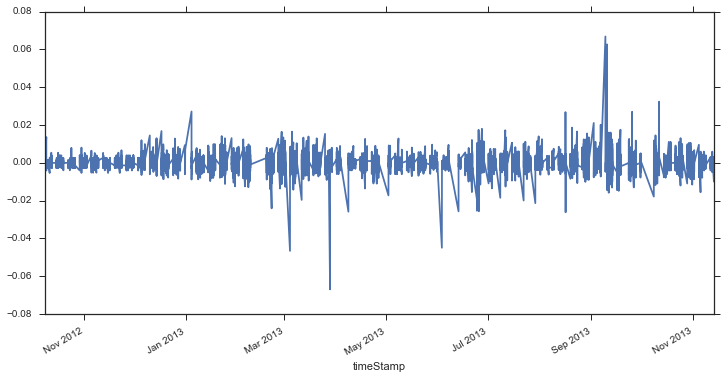

In [14]:
df.dropna(inplace=True)
df['return'].plot(figsize=(12,6))

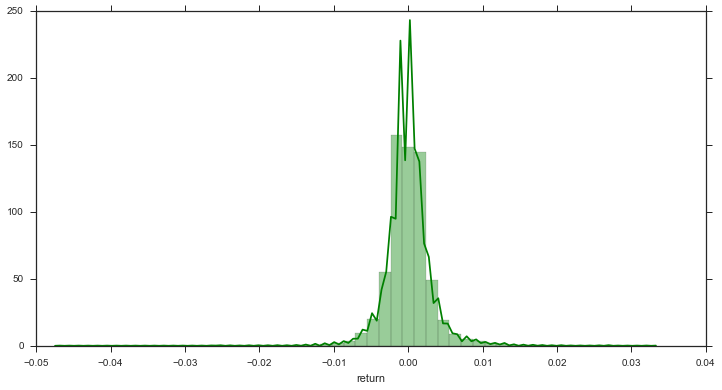

In [15]:
plt.figure(figsize=(12,6))

bins = sns.distplot(df['return'][(df['return']<0.05) & (df['return'] > -0.05)], color="g")

3. 使用**seaborn**绘制有吸引力的统计图
===================================
***

本节的例子来源于：[Seaborn Gallary](http://stanford.edu/~mwaskom/software/seaborn/examples/scatterplot_matrix.html)

In [16]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


d:\Miniconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


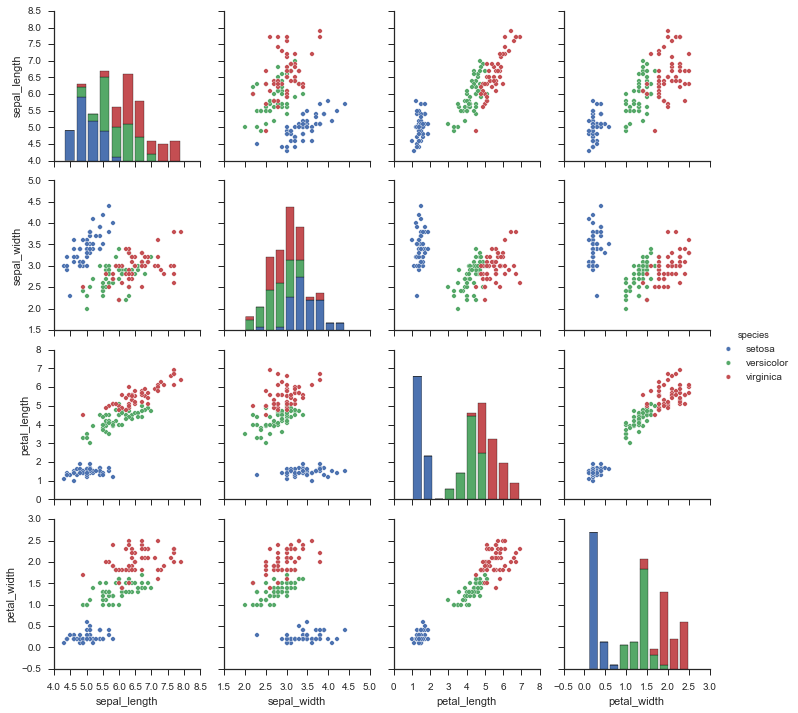

In [17]:
sns.pairplot(df, hue='species')

4. 在Notebook中实时更新绘图
===================
***

下面的例子中，我们展示在notebook中插入实时更新的图片。

* 我们将使用随机数生成一组股票价格时间序列；
* 股票价格序列标注蓝色；
* 在每次股票价格达到新高之时，会在新高点上标上<font color='red'>空心红圈</font>。

下面这段代码是整个图的骨架，多半是标题，坐标轴的设置等设计。

Using saved session configuration for http://localhost:5006/
To override, pass 'load_from_config=False' to Session



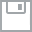
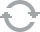
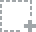
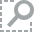
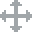
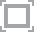
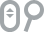
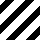
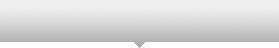
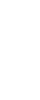
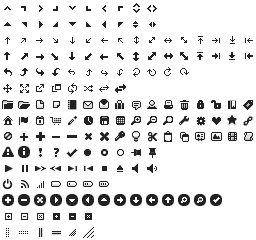
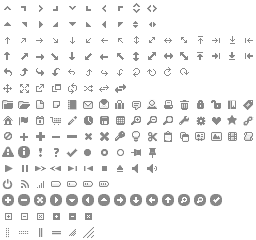
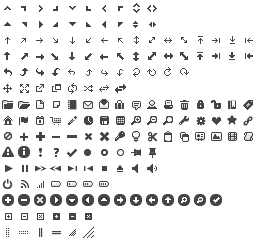
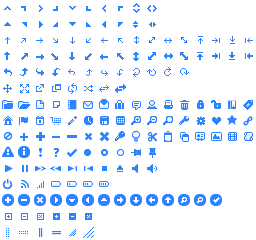
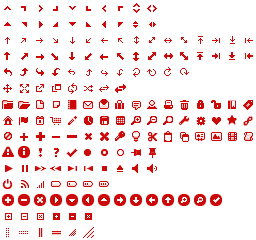
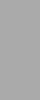
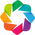
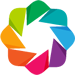

In [11]:
import time
import datetime as dt
from math import exp
from datetime import timedelta
import numpy as np
from bokeh.plotting import figure, output_notebook, show, Session

session = Session(root_url="http://10.63.6.149:5006")

# prepare output to server
output_notebook("Real Time Stock Price Plotting", session=session)

x = [dt.datetime(1995, 9, 1, 9, 30, 0)]
y = [15 * exp(np.random.randn(1, 1)[0] * 0.005 + 0.005)]
y2 = [np.nan]

current_max = y[0]

p = figure(plot_width=800, plot_height=500, x_axis_type="datetime")
p.line(x, y, line_join='round', name="ex_line")
p.circle(x, y2, color='red', size=18, fill_alpha=0.1, name="signal")
p.title = "Living Plotting Test"
p.title_text_color = "olive"
p.title_text_font = "times"
p.title_text_font_style = "italic"
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'
show(p)
session.publish()

现在图还很无聊，空空如也。让我们来给它加上点动画！

In [ ]:
tdelta = timedelta(days=1)

# create some simple animation..
# first get our figure example data source
renderer = p.select(dict(name="ex_line"))
ds = renderer[0].data_source

renderer2 = p.select(dict(name="signal"))
ds2 = renderer2[0].data_source

max_len = 5000

while True:
    # Update y data of the source object
    ds.data["x"] = np.append(ds.data["x"], ds.data["x"][-1] + tdelta)[-max_len:]
    ds.data["y"] = np.append(ds.data["y"], ds.data["y"][-1] * exp(np.random.randn(1, 1)[0] * 0.015 + 0.0002))[-max_len:]

    ds2.data["x"] = ds.data["x"]
    yy2 = ds2.data["y"]
    if ds.data["y"][-1] > current_max:
        current_max = ds.data["y"][-1]
        new_value = current_max
    else:
        new_value = np.nan

    ds2.data["y"] = np.append(yy2, new_value)[-max_len:]

    # store the updated source on the server
    session.store_objects(ds)
    session.store_objects(ds2)
    time.sleep(0.01)